# ANALYZING THE ACCIDENTS OCCURED IN UK IN 2019

This data consists of details of accidents happened in the year 2019 in UK. Data contains information of city details, road details, number of vehicles and casualities involved at which date and time. Weather conditions and road surface details at the time of accident

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
from scipy.stats import ttest_ind

In [2]:
#Reading csv file from the URL
url="https://roads.data.tfl.gov.uk/AccidentStats/Prod/2019-gla-data-extract-attendant.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.head()

,AREFNO,Borough,Boro,Easting,Northing,Location,Accident Severity,No. of Casualties in Acc.,No. of Vehicles in Acc.,Accident Date,...,Junction Detail,Junction Control,Road Class 2,Road No. 2,Ped. Crossing Decoded,Light Conditions (Banded),Weather,Road Surface,Special Conditions,C/W Hazard
0,1190128300,WESTMINSTER,1,528218,180407,On Park Lane 20 metres north of the junction w...,3 SLIGHT,3,2,19-Feb-19,...,01 ROUNDABOUT,2 AUTO SIG,A,4202,5 PEDN PHASE AT ATS,2 DAYLIGHT,1 FINE,1 ROAD-DRY,0 NONE,0 NONE
1,1190152270,LAMBETH,9,530219,172463,NFL Streatham High Road jw Chalcot Rd,3 SLIGHT,1,2,15-Jan-19,...,00 NO JUN IN 20M,-2 Not Applicable,0,0,9 UNKNOWN (S/R),1 DARK,1 FINE,1 ROAD-DRY,0 NONE,0 NONE
2,1190155191,CAMDEN,2,530222,182543,On Judd Street near the junction with Leight S...,3 SLIGHT,1,2,01-Jan-19,...,03 T/STAG JUN,4 GIVE WAY/UNCONTROLLED,6,0,0 NO XING FACILITY IN 50M,1 DARK,1 FINE,1 ROAD-DRY,0 NONE,0 NONE
3,1190155192,CAMDEN,2,525531,184605,On Broadhurst Gardens 10 metres east of the ju...,2 SERIOUS,1,1,01-Jan-19,...,03 T/STAG JUN,4 GIVE WAY/UNCONTROLLED,B,510,0 NO XING FACILITY IN 50M,1 DARK,1 FINE,1 ROAD-DRY,0 NONE,0 NONE
4,1190155194,BRENT,28,524920,184004,On Willesden Lane near the junction with Alder...,3 SLIGHT,2,2,01-Jan-19,...,06 CROSSROADS,4 GIVE WAY/UNCONTROLLED,6,0,0 NO XING FACILITY IN 50M,1 DARK,1 FINE,1 ROAD-DRY,0 NONE,0 NONE


In [3]:
#getting number of rows and columns in a dataframe
data.shape

(25313, 27)

In [4]:
#printing all the columns in a data frame
data.columns

Index(['AREFNO', 'Borough', 'Boro', 'Easting', 'Northing', 'Location',
       'Accident Severity', 'No. of Casualties in Acc.',
       'No. of Vehicles in Acc.', 'Accident Date', 'Day', 'Time', 'Highway',
       'Road Class 1', 'Road No. 1', 'Road Type', 'Speed Limit',
       'Junction Detail', 'Junction Control', 'Road Class 2', 'Road No. 2',
       'Ped. Crossing Decoded', 'Light Conditions (Banded)', 'Weather',
       'Road Surface', 'Special Conditions', 'C/W Hazard'],
      dtype='object')

In [5]:
#getting the mathematical values for the columns
data.describe()

,AREFNO,Boro,Easting,Northing,No. of Casualties in Acc.,No. of Vehicles in Acc.,Road No. 1,Speed Limit,Road No. 2
count,2.531300e+04,25313.000000,25313.000000,25313.000000,25313.000000,25313.000000,25313.000000,25313.000000,25313.000000
mean,1.754654e+09,15.197053,530639.411488,180605.362067,1.185399,1.803500,506.128669,28.393908,181.500968
std,5.119816e+09,9.872526,9782.659741,7513.158121,0.569065,0.649036,1073.879027,7.524138,688.734262
min,1.190128e+09,0.000000,503607.000000,156781.000000,1.000000,1.000000,0.000000,5.000000,0.000000
25%,1.190175e+09,7.000000,524960.000000,175981.000000,1.000000,1.000000,0.000000,20.000000,0.000000
50%,1.190193e+09,14.000000,530998.000000,181098.000000,1.000000,2.000000,105.000000,30.000000,0.000000
75%,1.190211e+09,25.000000,536396.000000,185623.000000,1.000000,2.000000,316.000000,30.000000,0.000000
max,4.819095e+10,32.000000,560066.000000,200857.000000,12.000000,13.000000,5205.000000,70.000000,5205.000000


In [6]:
#getting number of unique values in each column
data.nunique()

AREFNO                       25313
Borough                         33
Boro                            33
Easting                      17672
Northing                     16305
Location                     23171
Accident Severity                3
No. of Casualties in Acc.       11
No. of Vehicles in Acc.         10
Accident Date                  365
Day                              7
Time                          1402
Highway                          3
Road Class 1                     5
Road No. 1                     392
Road Type                        6
Speed Limit                     10
Junction Detail                 10
Junction Control                 6
Road Class 2                     6
Road No. 2                     383
Ped. Crossing Decoded            7
Light Conditions (Banded)        2
Weather                          9
Road Surface                     6
Special Conditions               9
C/W Hazard                       8
dtype: int64

In [7]:
#getting number of null values in each column
data.isnull().sum()

AREFNO                       0
Borough                      0
Boro                         0
Easting                      0
Northing                     0
Location                     0
Accident Severity            0
No. of Casualties in Acc.    0
No. of Vehicles in Acc.      0
Accident Date                0
Day                          0
Time                         0
Highway                      0
Road Class 1                 0
Road No. 1                   0
Road Type                    0
Speed Limit                  0
Junction Detail              0
Junction Control             0
Road Class 2                 0
Road No. 2                   0
Ped. Crossing Decoded        0
Light Conditions (Banded)    0
Weather                      0
Road Surface                 0
Special Conditions           0
C/W Hazard                   0
dtype: int64

In [8]:
#getting data types of each column in a data frame
data.dtypes

AREFNO                        int64
Borough                      object
Boro                          int64
Easting                       int64
Northing                      int64
Location                     object
Accident Severity            object
No. of Casualties in Acc.     int64
No. of Vehicles in Acc.       int64
Accident Date                object
Day                          object
Time                         object
Highway                      object
Road Class 1                 object
Road No. 1                    int64
Road Type                    object
Speed Limit                   int64
Junction Detail              object
Junction Control             object
Road Class 2                 object
Road No. 2                    int64
Ped. Crossing Decoded        object
Light Conditions (Banded)    object
Weather                      object
Road Surface                 object
Special Conditions           object
C/W Hazard                   object
dtype: object

In [9]:
#converting Accident date in object type pandas date time
data['Accident_date'] = pd.to_datetime(data['Accident Date'])
data.head()

,AREFNO,Borough,Boro,Easting,Northing,Location,Accident Severity,No. of Casualties in Acc.,No. of Vehicles in Acc.,Accident Date,...,Junction Control,Road Class 2,Road No. 2,Ped. Crossing Decoded,Light Conditions (Banded),Weather,Road Surface,Special Conditions,C/W Hazard,Accident_date
0,1190128300,WESTMINSTER,1,528218,180407,On Park Lane 20 metres north of the junction w...,3 SLIGHT,3,2,19-Feb-19,...,2 AUTO SIG,A,4202,5 PEDN PHASE AT ATS,2 DAYLIGHT,1 FINE,1 ROAD-DRY,0 NONE,0 NONE,2019-02-19
1,1190152270,LAMBETH,9,530219,172463,NFL Streatham High Road jw Chalcot Rd,3 SLIGHT,1,2,15-Jan-19,...,-2 Not Applicable,0,0,9 UNKNOWN (S/R),1 DARK,1 FINE,1 ROAD-DRY,0 NONE,0 NONE,2019-01-15
2,1190155191,CAMDEN,2,530222,182543,On Judd Street near the junction with Leight S...,3 SLIGHT,1,2,01-Jan-19,...,4 GIVE WAY/UNCONTROLLED,6,0,0 NO XING FACILITY IN 50M,1 DARK,1 FINE,1 ROAD-DRY,0 NONE,0 NONE,2019-01-01
3,1190155192,CAMDEN,2,525531,184605,On Broadhurst Gardens 10 metres east of the ju...,2 SERIOUS,1,1,01-Jan-19,...,4 GIVE WAY/UNCONTROLLED,B,510,0 NO XING FACILITY IN 50M,1 DARK,1 FINE,1 ROAD-DRY,0 NONE,0 NONE,2019-01-01
4,1190155194,BRENT,28,524920,184004,On Willesden Lane near the junction with Alder...,3 SLIGHT,2,2,01-Jan-19,...,4 GIVE WAY/UNCONTROLLED,6,0,0 NO XING FACILITY IN 50M,1 DARK,1 FINE,1 ROAD-DRY,0 NONE,0 NONE,2019-01-01


In [10]:
#getting unique values for a particular column in a data frame
data['Accident Severity'].unique()

array(['3 SLIGHT', '2 SERIOUS', '1 FATAL'], dtype=object)

Two types of values are stored in the same column. Which makes the data untidy.
eg: 3 is an integer where as SLIGHT is a string.

Making the data tidy by moving each different value to different columns

In [11]:
data[['AC_int', 'Accident Severity']] = data['Accident Severity'].str.split(' ', expand=True)

In [14]:
data[['Light Conditions_Code', 'Light Conditions (Banded)']] = data['Light Conditions (Banded)'].str.split(' ',1, expand=True)

C:\Users\poorn\AppData\Local\Temp\ipykernel_26500\1100786256.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['Light Conditions_Code', 'Light Conditions (Banded)']] = data['Light Conditions (Banded)'].str.split(' ',1, expand=True)


ValueError: Columns must be same length as key

In [ ]:
data[['Weather_int', 'Weather']] = data['Weather'].str.split(' ',1, expand=True)

In [ ]:
data[['PedCD_Code', 'Ped. Crossing Decoded']] = data['Ped. Crossing Decoded'].str.split(' ',1, expand=True)

In [ ]:
data[['Highway_Code', 'Highway']] = data['Highway'].str.split(' ',1, expand=True)

In [ ]:
data[['Road_Type_Code', 'Road Type']] = data['Road Type'].str.split(' ',1, expand=True)

In [ ]:
data[['Jun_Det_Code', 'Junction Detail']] = data['Junction Detail'].str.split(' ',1, expand=True)

In [ ]:
data[['JC_Code', 'Junction Control']] = data['Junction Control'].str.split(' ',1, expand=True)

In [ ]:
data[['RS_Code', 'Road Surface']] = data['Road Surface'].str.split(' ',1, expand=True)

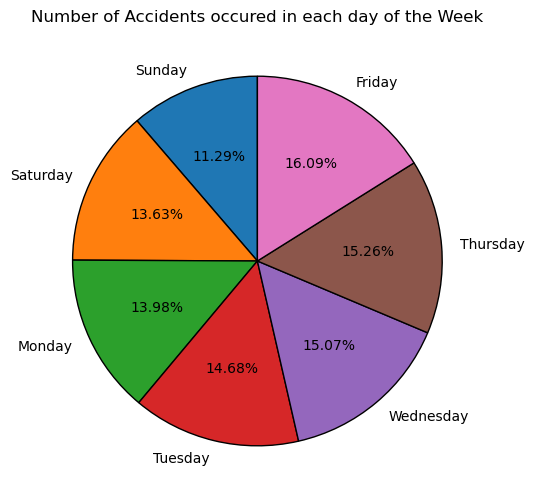

In [15]:
df=pd.DataFrame(data=data)

#grouping the number of accidents based on the day to find on which day most number of accidents took place
ac_week = df.groupby('Day')['Day'].count()
#sorting the values in ascending order
ac_week_sorted=ac_week.sort_values()

plt.figure(figsize=(6,6))

#plotting the pie chart
plt.pie(ac_week_sorted, startangle = 90, labels=ac_week_sorted.index , autopct='%0.2f%%', 
        wedgeprops ={'edgecolor' : 'Black'})

plt.title('Number of Accidents occured in each day of the Week')
plt.show()

Although there is only less differenxe between number of accidents occured in each day, Most number of accidents took place on Friday

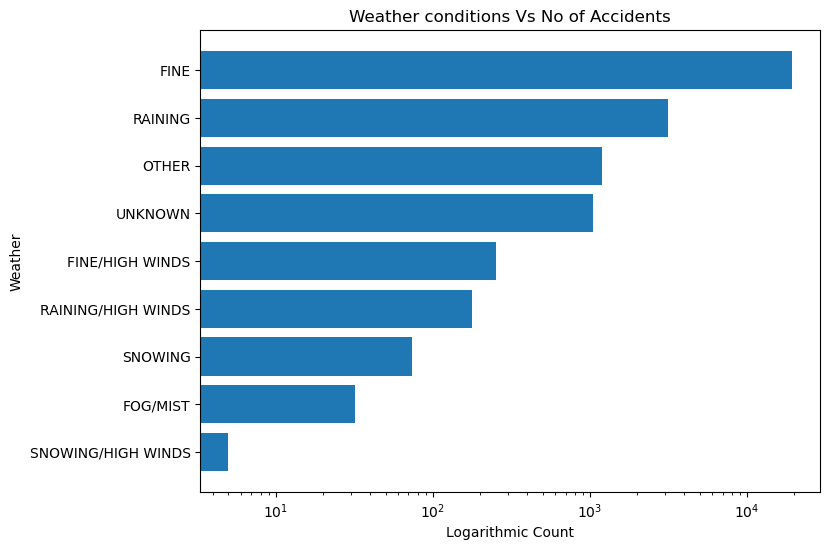

In [16]:
#grouping the values based on weather column to find at which weather most number of accidents occured
ac_Weather = df.groupby('Weather')['Weather'].count()
#sorting the values in ascending order
ac_Weather_Sorted=ac_Weather.sort_values()

plt.figure(figsize=(8,6))

#plotting the horizontal bar weather condition Vs count of Accidents
plt.barh(ac_Weather_Sorted.index, ac_Weather_Sorted.values, log=True)

#labelling the plot, x-axis and y-axis
plt.title('Weather conditions Vs No of Accidents')
plt.xlabel('Logarithmic Count')
plt.ylabel('Weather')

plt.show()

When the weather condition is fine and when it is raining most number off accidents took place

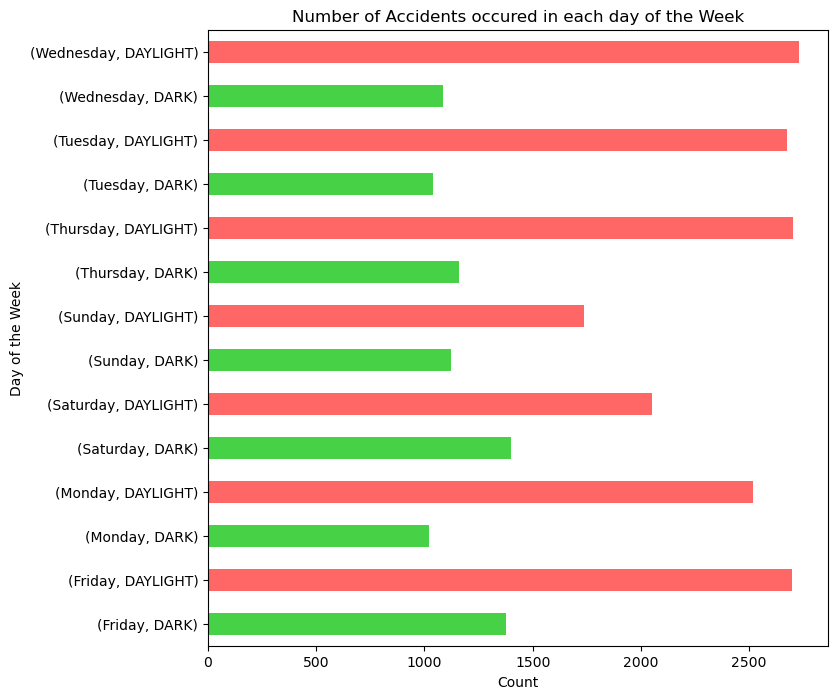

In [17]:
#grouping the values based on the day and light condition columns to find at on 
#which day and light conditions most of the accidents took place 
ac_week = df.groupby(['Day','Light Conditions (Banded)'])['Day'].count()

plt.figure(figsize=(8,8))

#horizontal bar plot for day and light Vs Count of Accidnets
ac_week.plot(kind='barh', color=['#47d147', '#ff6666'])

#nameing the plot, x-axis and y-axis 
plt.title('Number of Accidents occured in each day of the Week')
plt.xlabel('Count')
plt.ylabel('Day of the Week')

plt.show()

During Day light Friday has the most number of accidents followed by Thursday, Wednesday and Tuesday.
Where as during Dark light Saturday and friday has the most and almost same number of accidents

<Figure size 800x800 with 0 Axes>

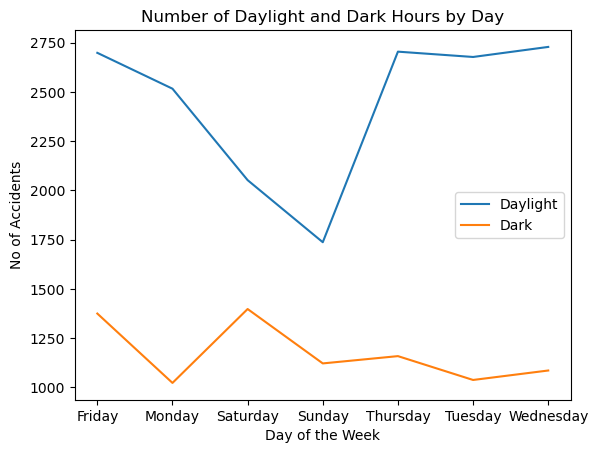

In [22]:
#plotting the above plot using line plot
light_hours  = df[df['Light Conditions (Banded)'] == 'DAYLIGHT'].groupby('Day').size()
dark_hours  = df[df['Light Conditions (Banded)'] == 'DARK'].groupby('Day').size()

plt.figure(figsize=(8,8))

plt.subplots()

light_hours.plot( label='Daylight')
dark_hours.plot( label='Dark')

#nameing the plot, x-axis and y-axis
plt.title('Number of Daylight and Dark Hours by Day')

plt.xlabel('Day of the Week')
plt.ylabel('No of Accidents')

plt.legend()
plt.show()

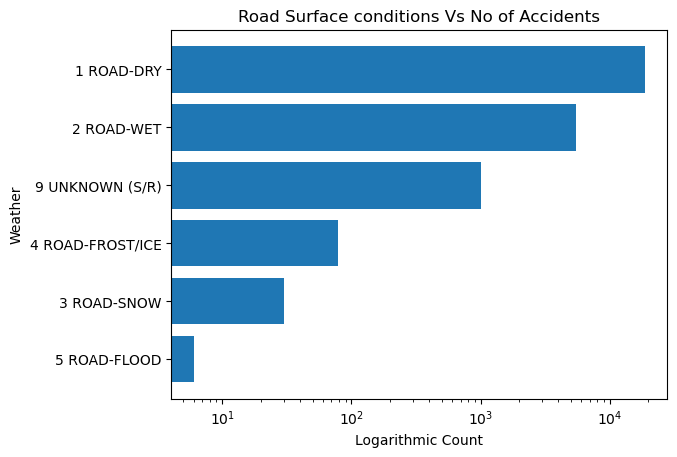

In [23]:
#grouping the values based on weather column to find at which weather most number of accidents occured
ac_RoadSurface = df.groupby('Road Surface')['Road Surface'].count()

#sorting the values in ascending order
ac_RoadSurface_Sorted=ac_RoadSurface.sort_values()

#plotting weather Vs Number of Accidents
plt.barh(ac_RoadSurface_Sorted.index, ac_RoadSurface_Sorted.values, log=True)
# Since the count of ROAD-FLOOD is very low to see the plot using logarithmic count

#nameing the plot, x-axis and y-axis 
plt.title('Road Surface conditions Vs No of Accidents')
plt.xlabel('Logarithmic Count')
plt.ylabel('Weather')


plt.show()

When the Road is Dry or Wet number off accidents happened

In [24]:
#dividing time in '%H%M' format to '%H'
df['time'] = df['Time'].str.replace("'", "")

# Extract the hour component of the time using dt.hour
df['Hour'] = pd.to_datetime(df['time'], format='%H%M').dt.hour

df.head()

,AREFNO,Borough,Boro,Easting,Northing,Location,Accident Severity,No. of Casualties in Acc.,No. of Vehicles in Acc.,Accident Date,...,Weather,Road Surface,Special Conditions,C/W Hazard,Accident_date,AC_int,Light Conditions_Code,Weather_int,time,Hour
0,1190128300,WESTMINSTER,1,528218,180407,On Park Lane 20 metres north of the junction w...,SLIGHT,3,2,19-Feb-19,...,FINE,1 ROAD-DRY,0 NONE,0 NONE,2019-02-19,3,2,1,1750,17
1,1190152270,LAMBETH,9,530219,172463,NFL Streatham High Road jw Chalcot Rd,SLIGHT,1,2,15-Jan-19,...,FINE,1 ROAD-DRY,0 NONE,0 NONE,2019-01-15,3,1,1,2145,21
2,1190155191,CAMDEN,2,530222,182543,On Judd Street near the junction with Leight S...,SLIGHT,1,2,01-Jan-19,...,FINE,1 ROAD-DRY,0 NONE,0 NONE,2019-01-01,3,1,1,0150,1
3,1190155192,CAMDEN,2,525531,184605,On Broadhurst Gardens 10 metres east of the ju...,SERIOUS,1,1,01-Jan-19,...,FINE,1 ROAD-DRY,0 NONE,0 NONE,2019-01-01,2,1,1,0120,1
4,1190155194,BRENT,28,524920,184004,On Willesden Lane near the junction with Alder...,SLIGHT,2,2,01-Jan-19,...,FINE,1 ROAD-DRY,0 NONE,0 NONE,2019-01-01,3,1,1,0040,0


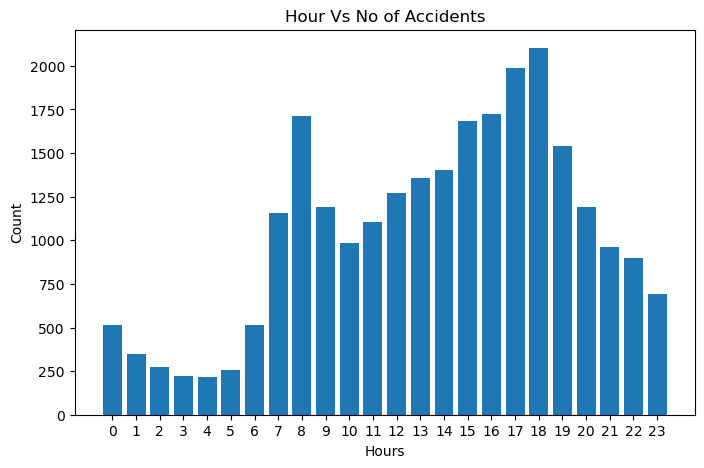

In [25]:
#grouping the values based on weather column to find at which weather most number of accidents occured
ac_Hour = df.groupby('Hour')['Hour'].count()

#sorting the values in ascending order
ac_Hour_Sorted=ac_Hour.sort_values()

plt.figure(figsize=(8,5))

#plotting Hour Vs Number of Accidnets
plt.bar(ac_Hour_Sorted.index, ac_Hour_Sorted.values)

#nameing the plot, x-axis and y-axis 
plt.title('Hour Vs No of Accidents')
plt.xlabel('Hours')
plt.xticks(range(0,24))
plt.ylabel('Count')


plt.show()

Most number of accidents happened during evening from 5 to 6 and at 8 AM

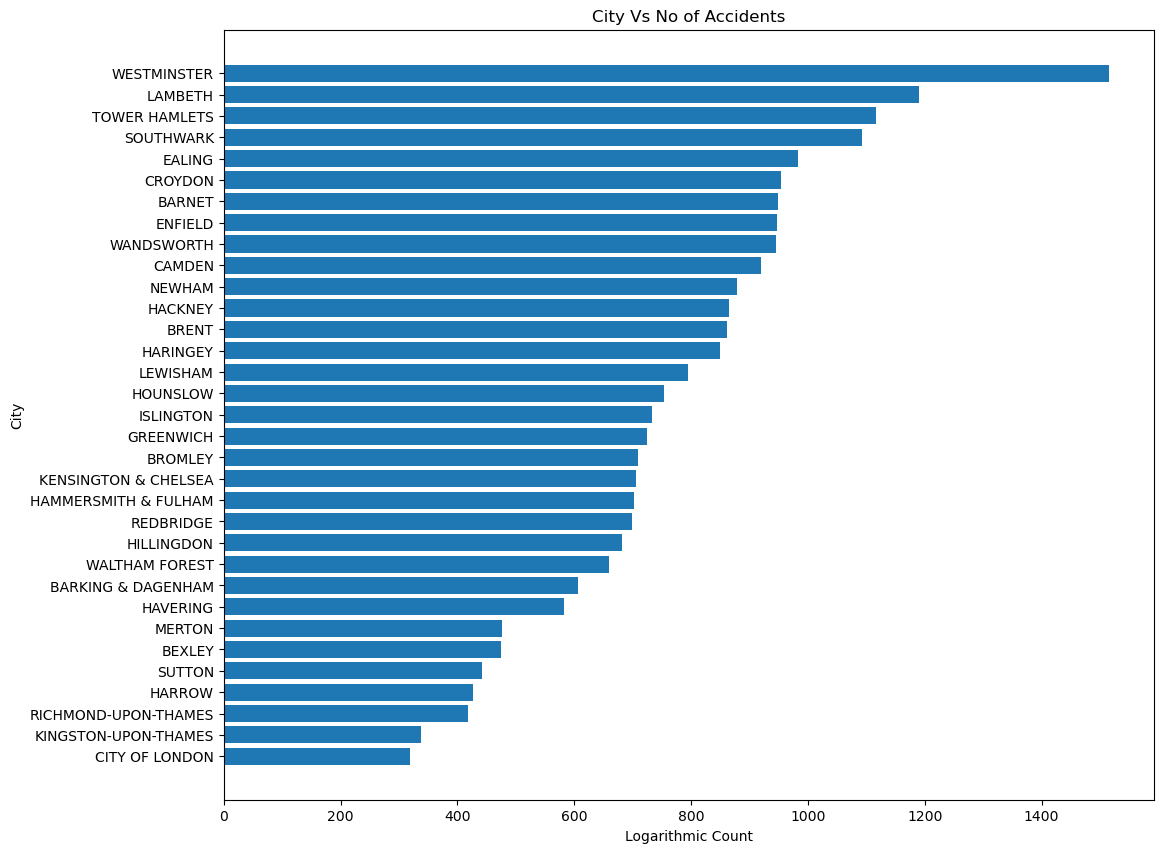

In [26]:
#grouping the values based on weather column to find at which weather most number of accidents occured
ac_Borough = df.groupby('Borough')['Borough'].count()

#sorting the values in ascending order
ac_Borough_Sorted=ac_Borough.sort_values()

plt.figure(figsize=(12,10))

#plotting City Vs Number of Accidnets
plt.barh(ac_Borough_Sorted.index, ac_Borough_Sorted.values)

#nameing the plot, x-axis and y-axis 
plt.title('City Vs No of Accidents')
plt.xlabel('Logarithmic Count')
plt.ylabel('City')


plt.show()

Westminster is the place where most number of accidents happened followed by lambeth. City of london recorded the least number of accidnets during the year 2019 in UK

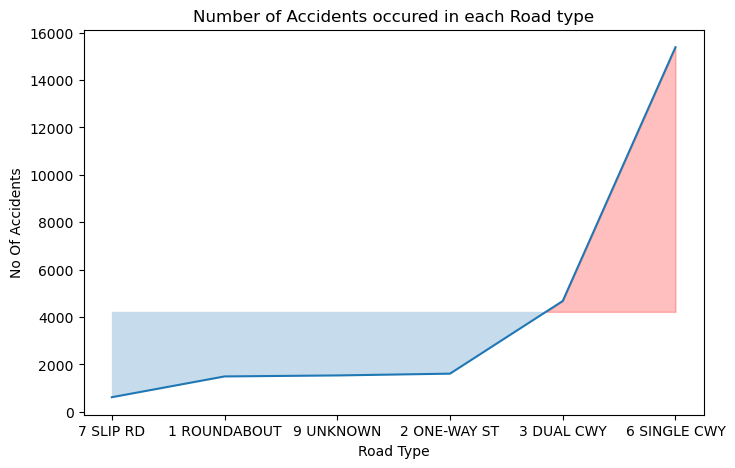

In [27]:
#grouping the values based on weather column to find at which weather most number of accidents occured
ac_Road_Type = df.groupby('Road Type')['Road Type'].count()

#sorting the values in ascending order
ac_Road_Type_sorted=ac_Road_Type.sort_values()

#finding average count of accidents
average = ac_Road_Type_sorted.values.mean()

plt.figure(figsize=(8,5))

#plotting Road type  Vs Number of Accidnets
plt.plot(ac_Road_Type_sorted.index, ac_Road_Type_sorted.values)

#filling the space between average and value to show the place where most number of accidents happened
plt.fill_between(ac_Road_Type_sorted.index, ac_Road_Type_sorted.values, average,
                where=(ac_Road_Type_sorted.values > average),
                interpolate=True, alpha=0.25, color= 'Red')

plt.fill_between(ac_Road_Type_sorted.index, ac_Road_Type_sorted.values, average,
                where=(ac_Road_Type_sorted.values <= average),
                interpolate=True, alpha=0.25)

#nameing the plot, x-axis and y-axis 
plt.title('Number of Accidents occured in each Road type')
plt.xlabel('Road Type')
plt.ylabel('No Of Accidents')
plt.show()

"Dual carriageway (Cwy) road" and "Single carriageway (Cwy)" are the road types where most number of accidents occured

C:\Users\poorn\AppData\Local\Temp\ipykernel_26500\61529899.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('Accident Severity').mean()


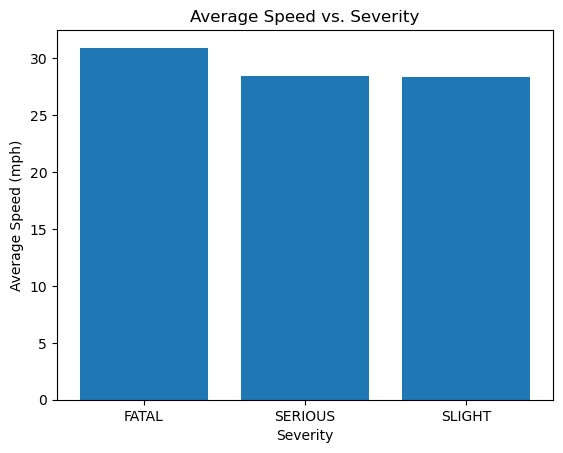

In [30]:
#grouping the values based on weather column to find at which weather most number of accidents occured
speed_severity = df[['Speed Limit', 'Accident Severity']]

grouped = df.groupby('Accident Severity').mean()

# Create a bar plot of Average speed vs. severity
plt.bar(grouped.index, grouped['Speed Limit'])

#nameing the plot, x-axis and y-axis 
plt.xlabel('Severity')
plt.ylabel('Average Speed (mph)')
plt.title('Average Speed vs. Severity')
plt.show()


Most number of accidents occured at the road where speed limit is 30 MPH

# Hypothesis

In [31]:

group_a = df[df['Borough'] == 'WESTMINSTER']['No. of Casualties in Acc.']
group_b = df[df['Borough'] == 'LAMBETH']['No. of Casualties in Acc.']
t_stat, p_value = ttest_ind(group_a, group_b)

# Print the results
print('t_statistic:', t_stat)
print('p_value:', p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print('Alternative hypothesis, Since there is significant difference between the Number of Casualties involved in the accidents happened between the two groups. Reject null hypothesis.')
else:
    print('Null hypothesis, Since there is no significant difference between the Number of Casualties involved in the accidents happened between the two groups.')


t_statistic: -0.5801016472171986
p_value: 0.5618943890045094
Null hypothesis, Since there is no significant difference between the Number of Casualties involved in the accidents happened between the two groups.


In [32]:
group_a = df[df['Day'] == 'Saturday']['No. of Casualties in Acc.']
group_b = df[df['Day'] == 'Monday']['No. of Casualties in Acc.']
t_stat, p_value = ttest_ind(group_a, group_b)

# Print the results
print('t_statistic:', t_stat)
print('p_value:', p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print('Alternative hypothesis, Since there is significant difference between the Number of Casualties involved in the accidents happened between the two groups. Reject null hypothesis.')
else:
    print('Null hypothesis, Since there is no significant difference between the Number of Casualties involved in the accidents happened between the two groups.')


t_statistic: 4.7221596574013045
p_value: 2.3790576796194836e-06
Alternative hypothesis, Since there is significant difference between the Number of Casualties involved in the accidents happened between the two groups. Reject null hypothesis.


In [33]:
group_a = df[df['Hour'] == 8]['No. of Casualties in Acc.']
group_b = df[df['Hour'] == 18]['No. of Casualties in Acc.']
t_stat, p_value = ttest_ind(group_a, group_b)

# Print the results
print('t_statistic:', t_stat)
print('p_value:', p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print('Alternative hypothesis, Since there is significant difference between the Number of Casualties involved in the accidents happened between the two groups. Reject null hypothesis.')
else:
    print('Null hypothesis, Since there is no significant difference between the Number of Casualties involved in the accidents happened between the two groups.')


t_statistic: -1.683577162186461
p_value: 0.09234525023191574
Null hypothesis, Since there is no significant difference between the Number of Casualties involved in the accidents happened between the two groups.


# Findings And Summary

Most number of Accidents took place during the time when people return to their home from work/school, and mostly on friday.Where westminster recorded the highest accidents city of London recorded the lowest.
At Fine weather conditions and better road status we can see most number of accidents, which states most number of accidnets happened at times where there are more vehicles on the road.